<a href="https://colab.research.google.com/github/madhav1489/Sales-Prediction/blob/main/Car_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# 1. LOAD THE DATA
df = pd.read_csv("/content/car data.csv")

In [ ]:
df.shape

(301, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [ ]:
#Checking for duplicate records
df.duplicated().sum()

np.int64(2)

In [ ]:
#dropping the duplicate records
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(299, 9)

#EDA

In [ ]:
df.corr(numeric_only=True)

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.234369,-0.053167,-0.525714,-0.181639
Selling_Price,0.234369,1.000000,0.876305,0.028566,-0.087880
Present_Price,-0.053167,0.876305,1.000000,0.205224,0.009948
Driven_kms,-0.525714,0.028566,0.205224,1.000000,0.089367
Owner,-0.181639,-0.087880,0.009948,0.089367,1.000000


Text(0.5, 1.0, 'Correlation heatmap')

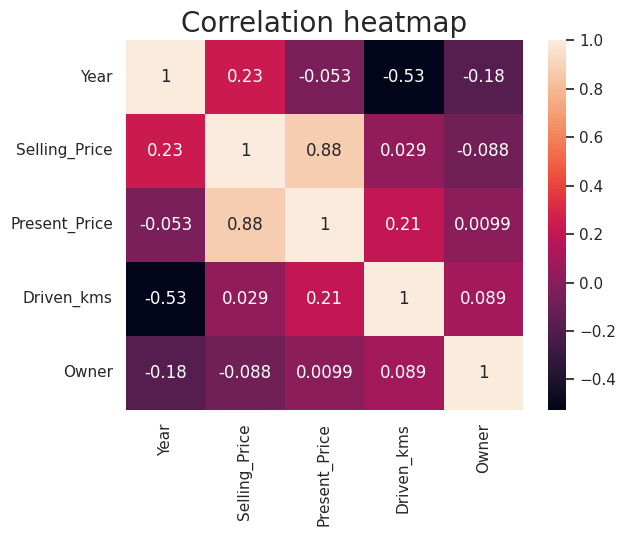

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title('Correlation heatmap',fontsize=20)

Text(0.5, 1.0, 'Present Price vs Selling Price')

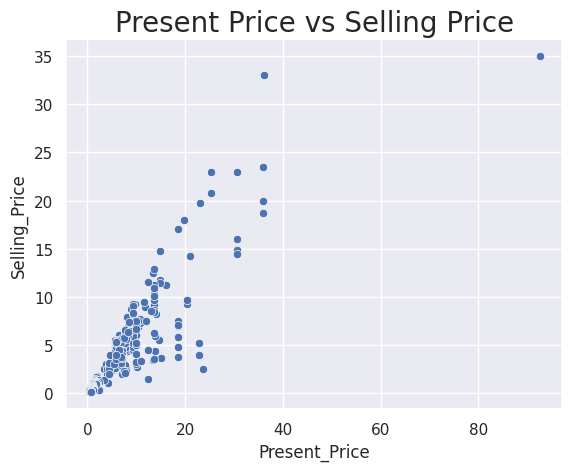

In [ ]:
sns.scatterplot(x=df['Present_Price'],y=df['Selling_Price'])
plt.title('Present Price vs Selling Price',fontsize=20)

In [ ]:
#counting the numbers of owner belonging to each car
df['Owner'].value_counts()

,count
Owner,
0,288
1,10
3,1


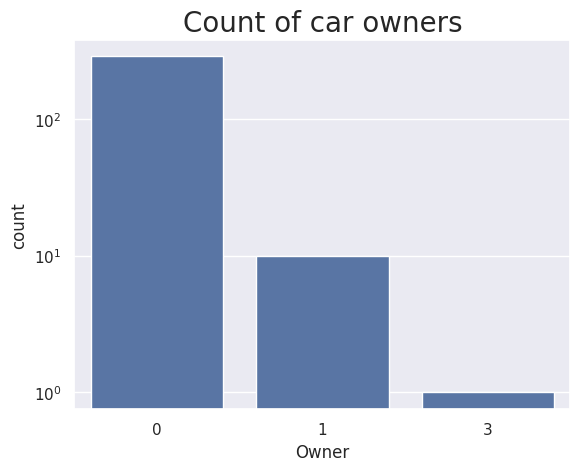

In [ ]:
sns.countplot(x=df['Owner'])
plt.title('Count of car owners',fontsize=20)
plt.yscale('log')

In [ ]:
#counting the number of people belonging to each of the following classes
df['Selling_type'].value_counts()

,count
Selling_type,
Dealer,193
Individual,106


Text(0.5, 1.0, 'people belonging to different selling types')

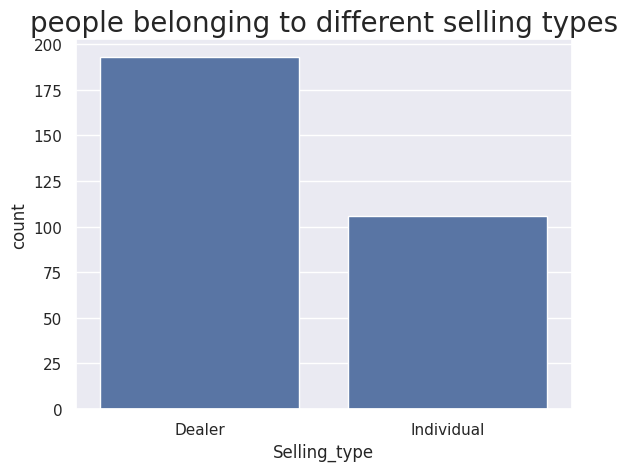

In [ ]:
sns.countplot(x=df['Selling_type'])
plt.title('people belonging to different selling types',fontsize=20)

In [ ]:
#counting the total number of different types of fuel type
df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,239
Diesel,58
CNG,2


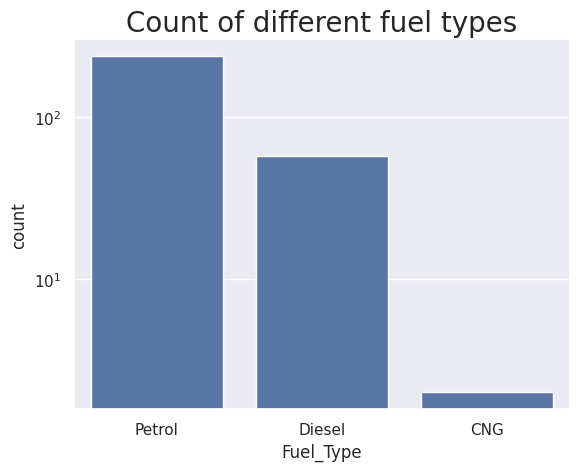

In [ ]:
sns.countplot(x=df['Fuel_Type'])
plt.title('Count of different fuel types',fontsize=20)
plt.yscale('log')

In [ ]:
#counting the value of different transmission types
df['Transmission'].value_counts()

,count
Transmission,
Manual,260
Automatic,39


Text(0.5, 1.0, 'Count of different transmission types')

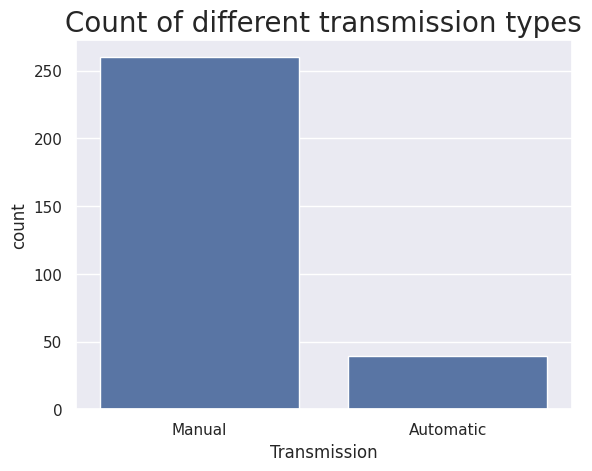

In [ ]:
sns.countplot(x=df['Transmission'])
plt.title('Count of different transmission types',fontsize=20)


In [ ]:
#checking the number of different car names
df['Car_Name'].value_counts()

,count
Car_Name,
city,26
corolla altis,16
verna,14
brio,10
fortuner,10
...,...
Honda Activa 125,1
Hero Hunk,1
Hero Ignitor Disc,1


Model Building and Evaluation


In [ ]:
df=pd.get_dummies(df,columns=['Fuel_Type','Selling_type','Transmission'])

In [ ]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,False,False,True,True,False,False,True
1,sx4,2013,4.75,9.54,43000,0,False,True,False,True,False,False,True
2,ciaz,2017,7.25,9.85,6900,0,False,False,True,True,False,False,True
3,wagon r,2011,2.85,4.15,5200,0,False,False,True,True,False,False,True
4,swift,2014,4.60,6.87,42450,0,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,False,True,False,True,False,False,True
297,brio,2015,4.00,5.90,60000,0,False,False,True,True,False,False,True
298,city,2009,3.35,11.00,87934,0,False,False,True,True,False,False,True
299,city,2017,11.50,12.50,9000,0,False,True,False,True,False,False,True


In [ ]:
#separating the input features and target variables
x=df.drop(['Car_Name','Selling_Price'],axis=1).values
y=df['Selling_Price'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

In [ ]:
#Importing multiple Linear Regression Model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=sqrt(mse)
print('Linear Regression Model')
print('Root Mean Squared Error:',rmse)
print('R2 Score:',r2_score(y_test,y_pred))


Linear Regression Model
Root Mean Squared Error: 1.698634381203715
R2 Score: 0.8177577554166556


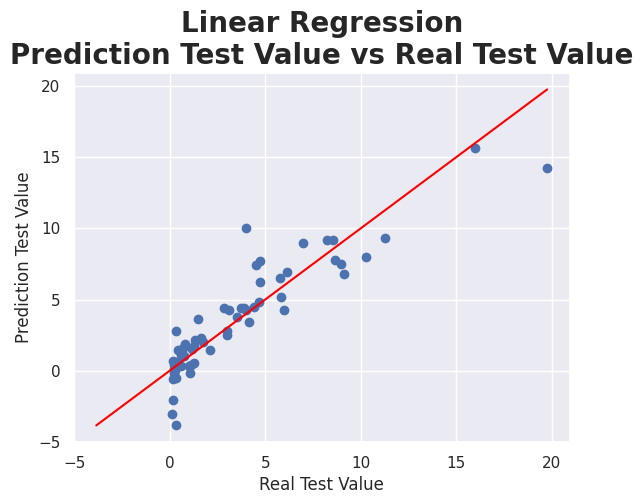

In [ ]:
#Plotting a graph for the prediction test value and real test value\
max_value=max(max(y_pred),max(y_test))
min_value=min(min(y_pred),min(y_test))
plt.scatter(y_test,y_pred)
plt.plot([min_value,max_value],[min_value,max_value],color='red',linestyle='-')
plt.xlabel('Real Test Value')
plt.ylabel('Prediction Test Value')
plt.title('Linear Regression\nPrediction Test Value vs Real Test Value', fontsize = 20, fontweight = 'bold')
plt.show()

In [ ]:
#Implementing decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=sqrt(mse)
print('Decision Tree Regressor Model')
print('Root Mean Squared Error:',rmse)
print('R2 Score:',r2_score(y_test,y_pred))

Decision Tree Regressor Model
Root Mean Squared Error: 1.2446632744106603
R2 Score: 0.9021517673201382


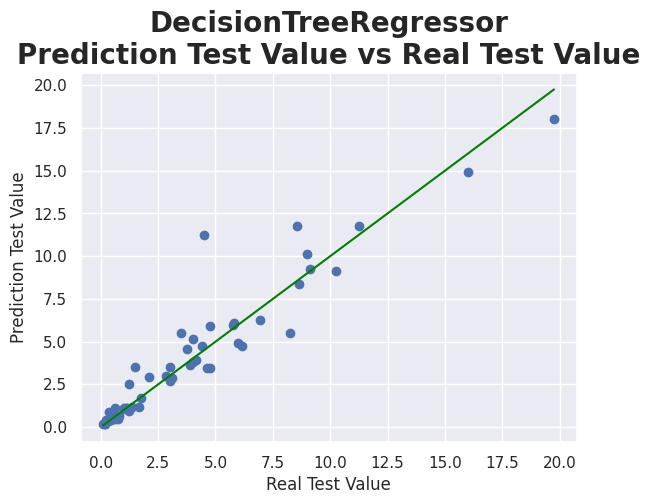

In [ ]:
#Plotting a graph for the prediction test value and real test value
max_value=max(max(y_pred),max(y_test))
min_value=min(min(y_pred),min(y_test))
plt.scatter(y_test,y_pred)
plt.plot([min_value,max_value],[min_value,max_value],color='green',linestyle='-')
plt.xlabel('Real Test Value')
plt.ylabel('Prediction Test Value')
plt.title('DecisionTreeRegressor\nPrediction Test Value vs Real Test Value', fontsize = 20, fontweight = 'bold')
plt.show()

In [ ]:
#Implementing RandomForest Classifier
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=sqrt(mse)
print('Random Forest Regressor Model')
print('Root Mean Squared Error:',rmse)
print('R2 Score:',r2_score(y_test,y_pred))

Random Forest Regressor Model
Root Mean Squared Error: 0.7947045674337098
R2 Score: 0.9601103107083583


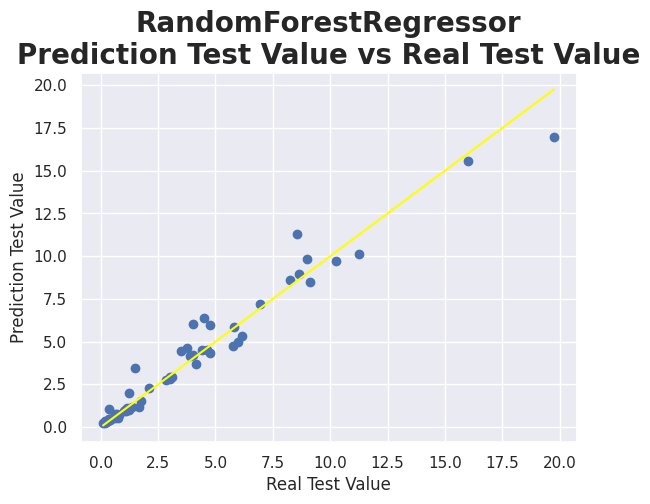

In [ ]:
#Plotting a graph for the prediction test value and real test value
max_value=max(max(y_pred),max(y_test))
min_value=min(min(y_pred),min(y_test))
plt.scatter(y_test,y_pred)
plt.plot([min_value,max_value],[min_value,max_value],color='yellow',linestyle='-')
plt.xlabel('Real Test Value')
plt.ylabel('Prediction Test Value')
plt.title('RandomForestRegressor\nPrediction Test Value vs Real Test Value', fontsize = 20, fontweight = 'bold')
plt.show()

# Conclusion
We select RandomForest Regressor as our model judging by the rmse value and r2 score
